# A02 - Graphical Exploration

---

```{admonition} Revised
21 May 2023
```
```{contents}
```

---

## Programming Environment

In [1]:
packages <- c(
  'COUNT',
  'dcData',
  'esquisse',
  'mosaic',
  'rmarkdown',
  'tidytuesdayR',
  'tidyverse'
)

# Install packages not yet installed
installed_packages <- packages %in% rownames(installed.packages())
if (any(installed_packages == FALSE)) {
  install.packages(packages[!installed_packages])
}

# Load packages
invisible(lapply(packages, library, character.only = TRUE))

sessionInfo()

Loading required package: msme

Loading required package: MASS

Loading required package: lattice

Loading required package: sandwich

Registered S3 method overwritten by 'mosaic':
  method                           from   
  fortify.SpatialPolygonsDataFrame ggplot2


The 'mosaic' package masks several functions from core packages in order to add 
additional features.  The original behavior of these functions should not be affected by this.


Attaching package: ‘mosaic’


The following objects are masked from ‘package:dplyr’:

    count, do, tally


The following object is masked from ‘package:Matrix’:

    mean


The following object is masked from ‘package:ggplot2’:

    stat


The following objects are masked from ‘package:stats’:

    binom.test, cor, cor.test, cov, fivenum, IQR, median, prop.test,
    quantile, sd, t.test, var


The following objects are masked from ‘package:base’:

    max, mean, min, prod, range, sample, sum


── Attaching core tidyverse packages ───────────────

R version 4.3.0 (2023-04-21)
Platform: aarch64-apple-darwin20 (64-bit)
Running under: macOS Ventura 13.3.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.11.0

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: America/New_York
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] lubridate_1.9.2    forcats_1.0.0      stringr_1.5.0      purrr_1.0.1       
 [5] readr_2.1.4        tidyr_1.3.0        tibble_3.2.1       tidyverse_2.0.0   
 [9] tidytuesdayR_1.0.2 rmarkdown_2.22     mosaic_1.8.4.2     mosaicData_0.20.3 
[13] ggformula_0.10.4   dplyr_1.1.2        Matrix_1.5-4       ggplot2_3.4.2     
[17] esquisse_1.1.2     dcData_0.1.0       COUNT_1.3.4        sandwich_3.0-2    
[21]

---

glyph (mark, symbol) - the basic graphical unit, often corresponding to a case
* e.g., scatter, density, bar, etc.

aesthetic - a visual property of a glyph (e.g., position, size, shape, color, etc.)
* may be mapped, based on the data values (e.g., sex -> color)
* may be set, or fixed to arbitrary non-data values (color=blue)

scale - a mapping that translates data values to aesthetics

frame - the position scale, describing how data are mapped to the coordinate system
* What are the axis limits?
* What kind of scale?: linear, logarithmic, etc.

guide - the legend, helpful for the reader to translage aesthetics back to data values
* axis ticks, axis labels; legend; labels

facet

layer

stat

,x,Sepal.Width,y,Petal.Width,color
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


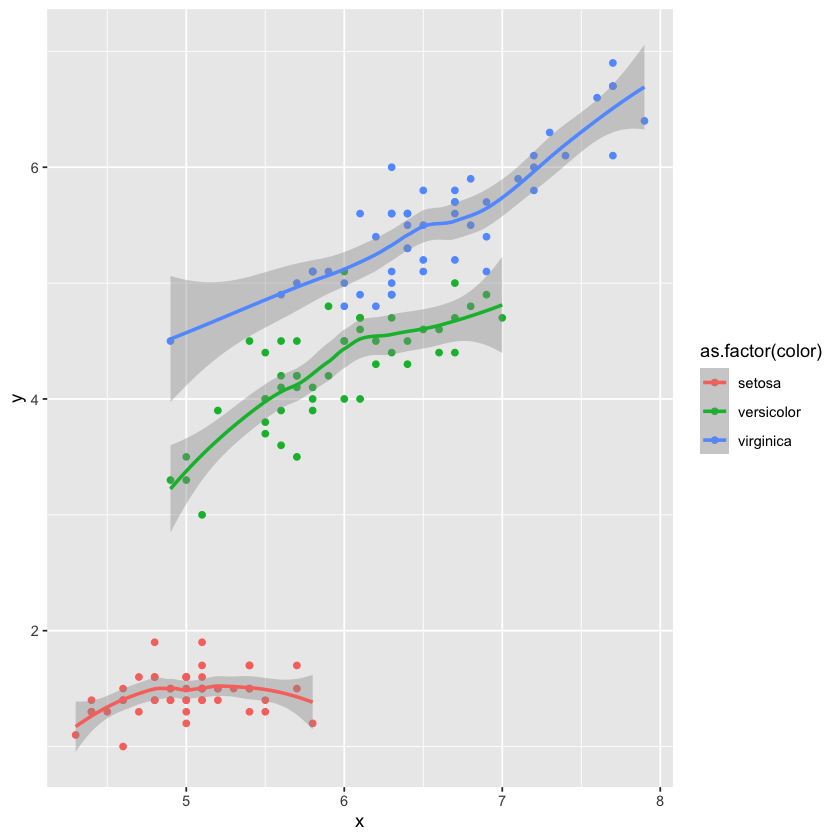

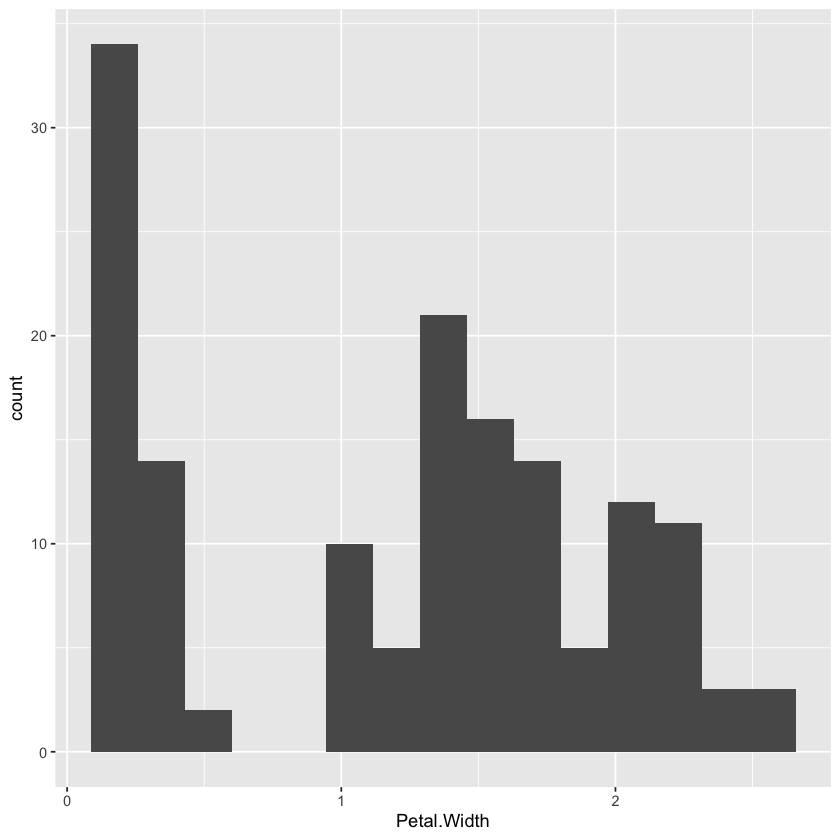

In [2]:
data('iris')
iris.glyphready <- iris %>%
  rename(x=Sepal.Length,y=Petal.Length,color=Species)
head(iris.glyphready)
ggplot(data=iris.glyphready,aes(x=x,y=y,color=as.factor(color))) +
  geom_point() +
  geom_smooth(se=TRUE)
ggplot(data=iris,aes(x=Petal.Width)) +
  geom_histogram(bins=15)

## A02

In [3]:
data('diamonds',package='ggplot2')
diamonds

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48
0.24,Very Good,I,VVS1,62.3,57,336,3.95,3.98,2.47
0.26,Very Good,H,SI1,61.9,55,337,4.07,4.11,2.53
0.22,Fair,E,VS2,65.1,61,337,3.87,3.78,2.49


In [4]:
?diamonds

diamonds                package:ggplot2                R Documentation

_P_r_i_c_e_s _o_f _o_v_e_r _5_0,_0_0_0 _r_o_u_n_d _c_u_t _d_i_a_m_o_n_d_s

_D_e_s_c_r_i_p_t_i_o_n:

     A dataset containing the prices and other attributes of almost
     54,000 diamonds. The variables are as follows:

_U_s_a_g_e:

     diamonds
     
_F_o_r_m_a_t:

     A data frame with 53940 rows and 10 variables:

     price price in US dollars ($326-$18,823)

     carat weight of the diamond (0.2-5.01)

     cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

     color diamond colour, from D (best) to J (worst)

     clarity a measurement of how clear the diamond is (I1 (worst),
          SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

     x length in mm (0-10.74)

     y width in mm (0-58.9)

     z depth in mm (0-31.8)

     depth total depth percentage = z / mean(x, y) = 2 * z / (x + y)
          (43-79)

     table width of top of diamond r

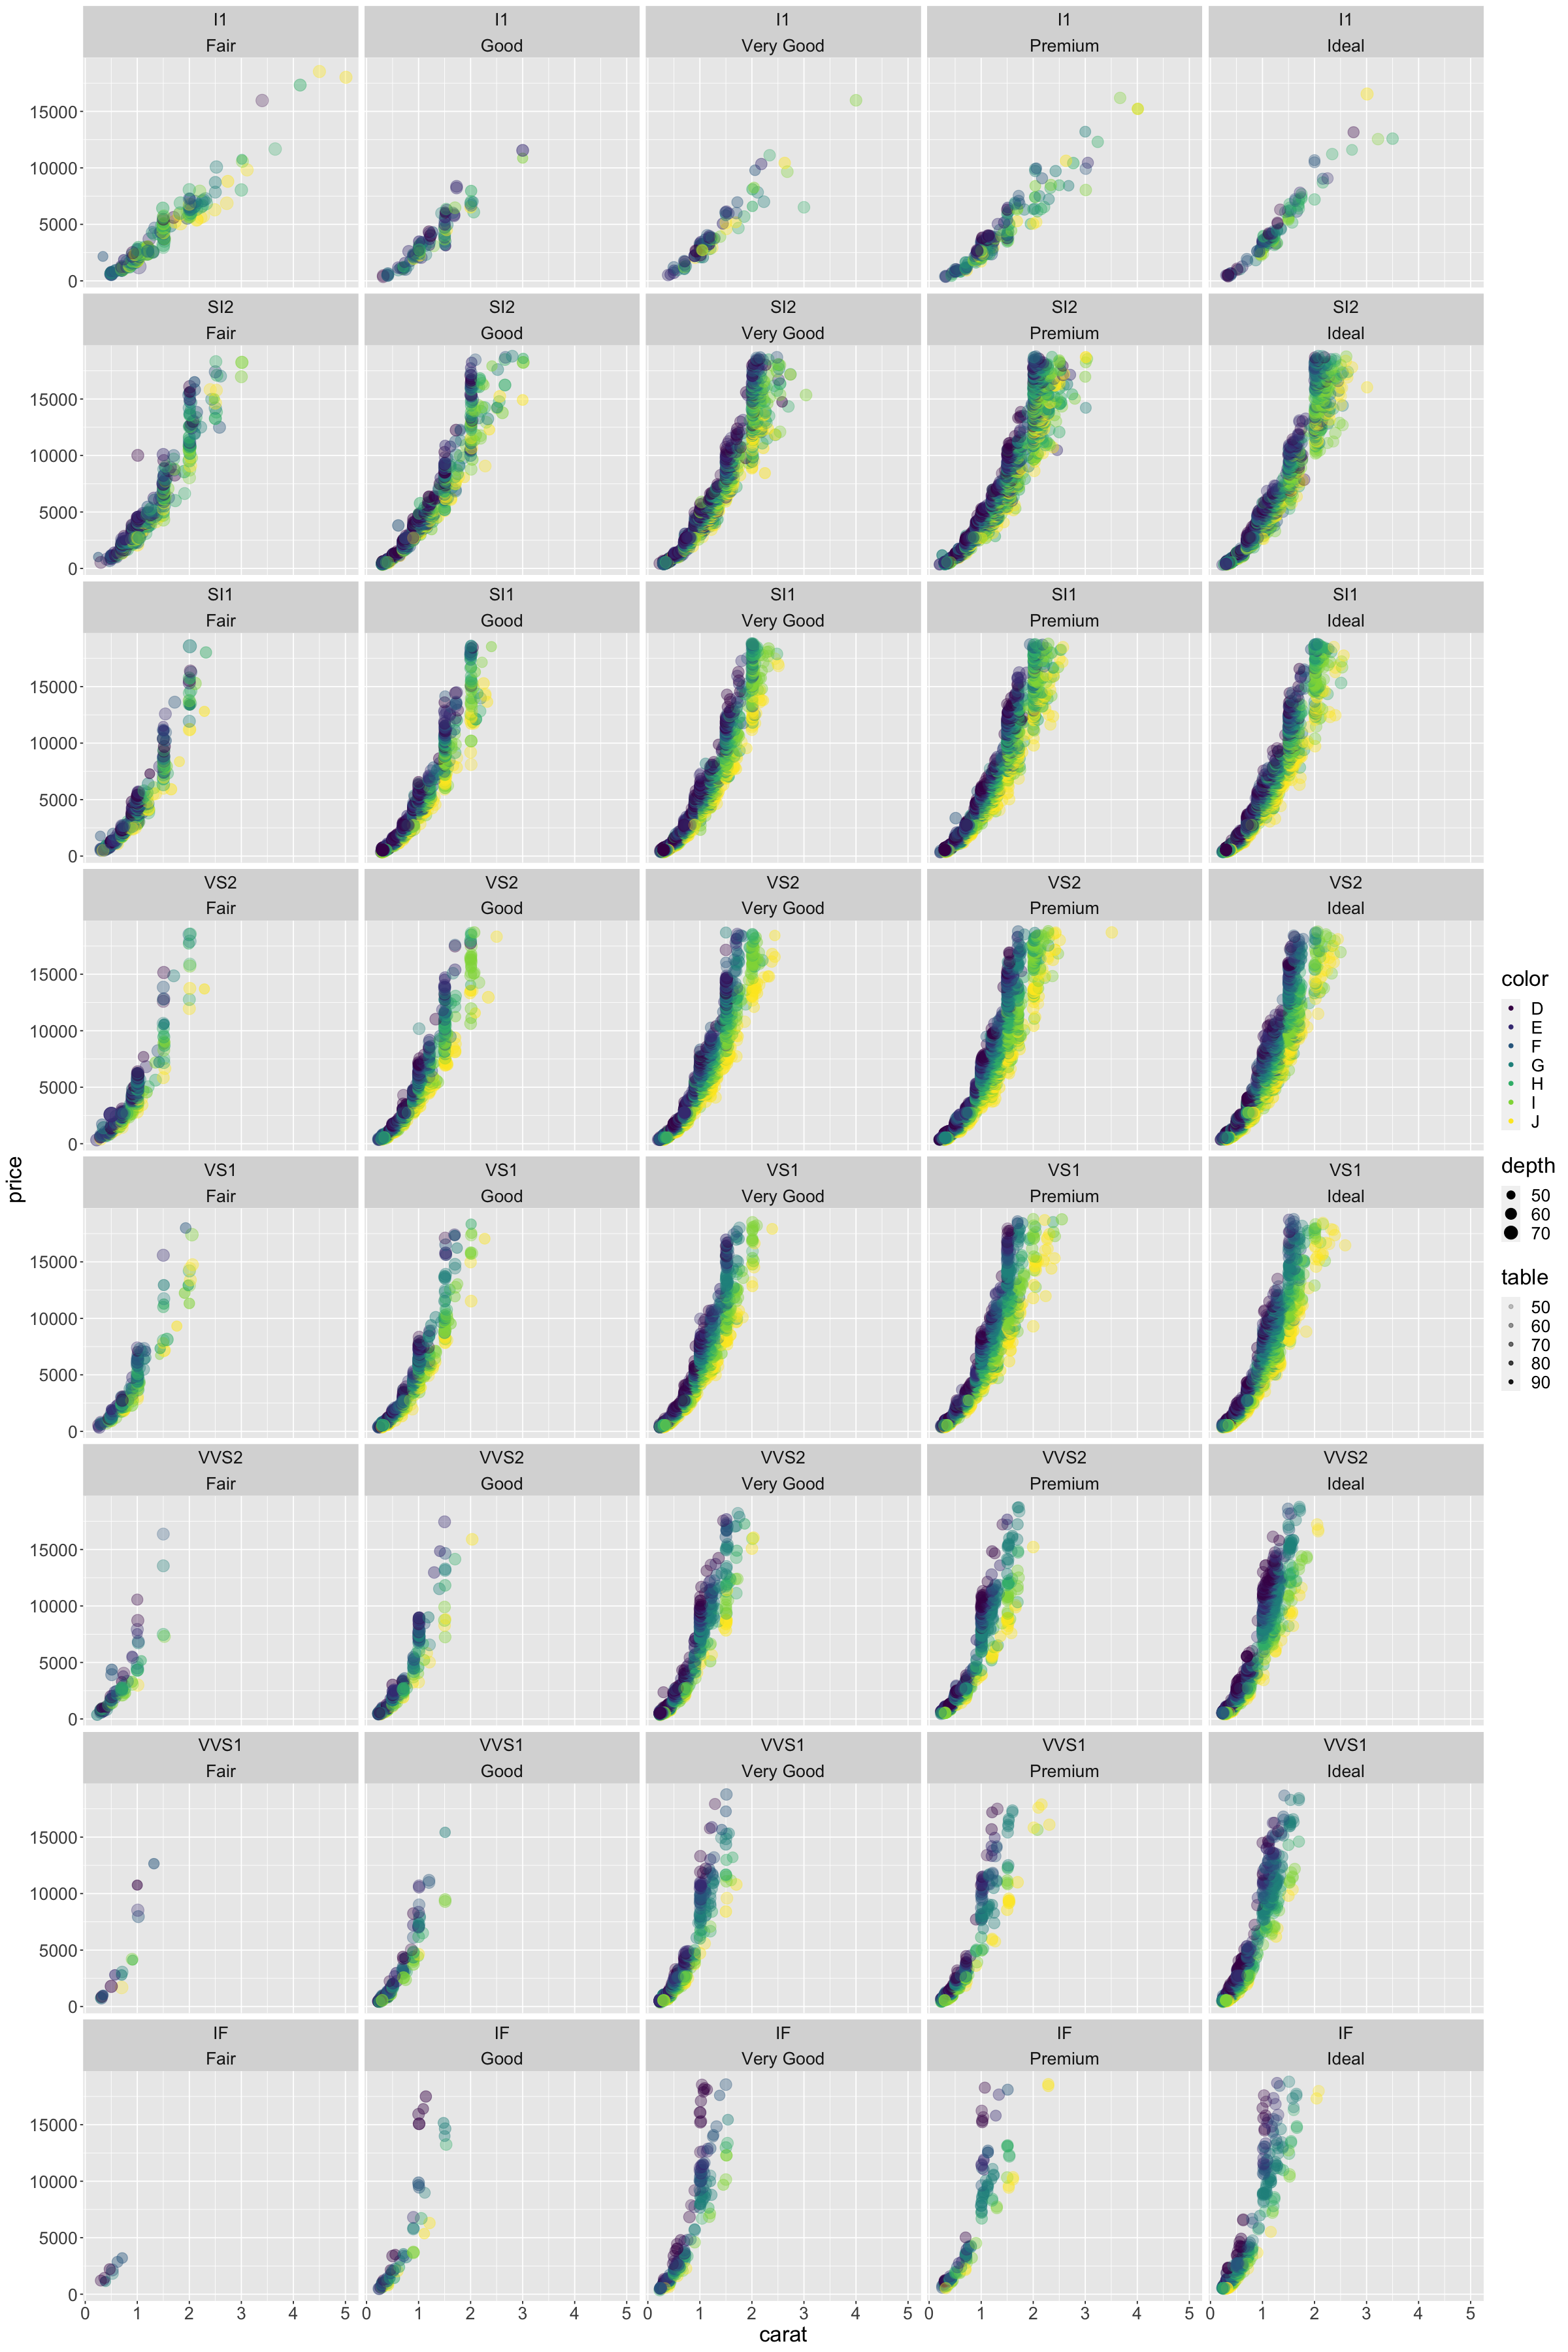

In [5]:
options(repr.plot.width=20,repr.plot.height=30)

plt <- ggplot(data=diamonds) +
  geom_point(aes(x=carat,
                 y=price,
                 color=color,
                 #shape=clarity,
                 size=depth,
                 alpha=table)) +
  facet_wrap(clarity~cut,nrow=8) +
  theme(text=element_text(size=20))
plt

#suppressWarnings(print(plt))

In [6]:
# https://www.kaggle.com/datasets/crawford/80-cereals
cereal <- read_csv('cereal.csv')
cereal

Rows: 77 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): name, mfr, type
dbl (13): calories, protein, fat, sodium, fiber, carbo, sugars, potass, vita...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.40297
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.98368
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.42551
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.70491
Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.38484
Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.50954
Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.17409
Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.03856
Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.12025


In [7]:
cereal %>%
  count(mfr) %>%
    arrange(desc(n))
cereal %>%
  count(type) %>%
    arrange(desc(n))
cereal %>%
  count(calories) %>%
    arrange(desc(n))
cereal %>%
  count(protein) %>%
    arrange(desc(n))
cereal %>%
  count(fat) %>%
    arrange(desc(n))

mfr,n
<chr>,<int>
K,23
G,22
P,9
Q,8
R,8
N,6
A,1


type,n
<chr>,<int>
C,74
H,3


calories,n
<dbl>,<int>
110,29
100,17
120,10
90,7
50,3
140,3
70,2
130,2
150,2


protein,n
<dbl>,<int>
3,28
2,25
1,13
4,8
6,2
5,1


fat,n
<dbl>,<int>
1,30
0,27
2,14
3,5
5,1


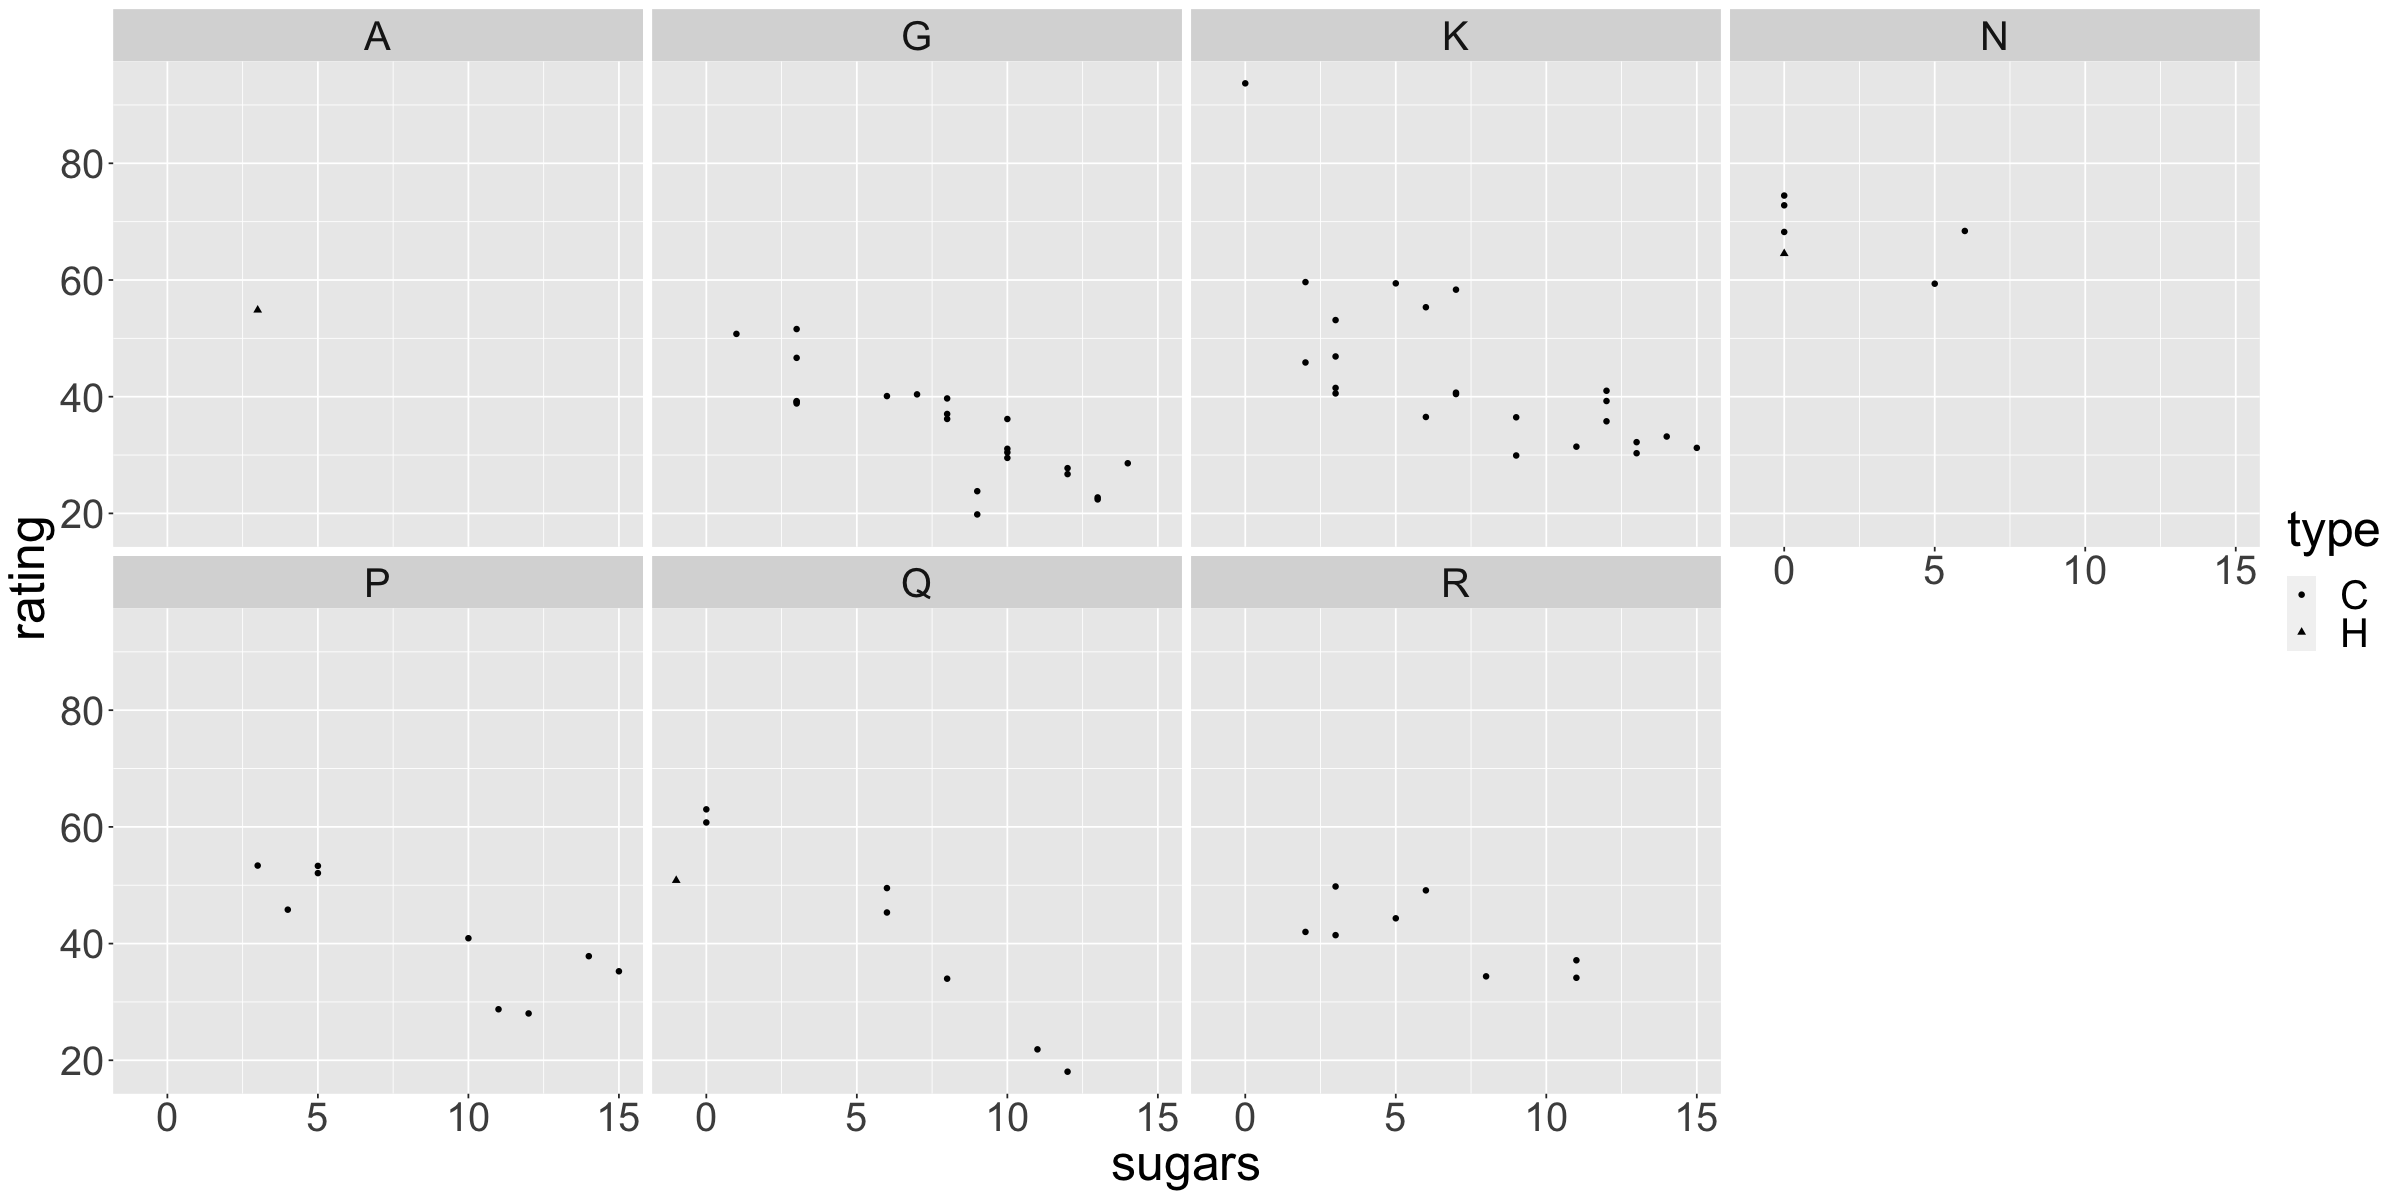

In [8]:
options(repr.plot.width=20,repr.plot.height=10)

plt <- ggplot(data=cereal) +
  geom_point(aes(x=sugars,
                 y=rating,
                 #color=color,
                 shape=type)) +
                 #size=depth,
                 #alpha=table)) +
  facet_wrap(~mfr,nrow=2) +
  theme(text=element_text(size=30))
plt

#suppressWarnings(print(plt))

---